<a href="https://colab.research.google.com/github/Aryan625/Pytorch-Image-Classifier/blob/main/Pytorch_Image_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install torch==1.10.2+cu113 torchvision==0.11.3+cu113 torchaudio==0.10.2+cu113 -f https://download.pytorch.org/whl/cu113/torch_stable.html

Looking in links: https://download.pytorch.org/whl/cu113/torch_stable.html
     |██████████████▋                 | 834.1 MB 1.3 MB/s eta 0:12:20tcmalloc: large alloc 1147494400 bytes == 0x55b591384000 @  0x7fa7731cf615 0x55b55706e3bc 0x55b55714f18a 0x55b5570711cd 0x55b557163b3d 0x55b5570e5458 0x55b5570e002f 0x55b557072aba 0x55b5570e52c0 0x55b5570e002f 0x55b557072aba 0x55b5570e1cd4 0x55b557164986 0x55b5570e1350 0x55b557164986 0x55b5570e1350 0x55b557164986 0x55b5570e1350 0x55b557072f19 0x55b5570b6a79 0x55b557071b32 0x55b5570e51dd 0x55b5570e002f 0x55b557072aba 0x55b5570e1cd4 0x55b5570e002f 0x55b557072aba 0x55b5570e0eae 0x55b5570729da 0x55b5570e1108 0x55b5570e002f
     |██████████████████▌             | 1055.7 MB 1.3 MB/s eta 0:09:49tcmalloc: large alloc 1434370048 bytes == 0x55b5d59da000 @  0x7fa7731cf615 0x55b55706e3bc 0x55b55714f18a 0x55b5570711cd 0x55b557163b3d 0x55b5570e5458 0x55b5570e002f 0x55b557072aba 0x55b5570e52c0 0x55b5570e002f 0x55b557072aba 0x55b5570e1cd4 0x55b557164986 0x55b5

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import torch.optim.lr_scheduler as lr_scheduler
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [ ]:
#hyperparameters
num_epochs = 100
batch_size = 16
learning_rate = 0.001

In [ ]:
#dataset has PIL images of range[0, 1]. We transform them to tensor of normalized range[-1, 1]
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [ ]:
#CIFAR10
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, transform=transform)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data


In [ ]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

In [ ]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

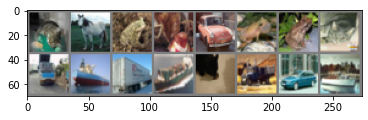

cat, horse, frog, cat, car, frog, frog, cat, truck, ship, truck, ship, cat, truck, car, ship


In [ ]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
examples = iter(train_loader)
images, labels = examples.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(', '.join(f'{classes[labels[j]]}' for j in range(batch_size)))

In [ ]:
# model
class ConvNet(nn.Module):
  def __init__(self):
    super(ConvNet, self).__init__()
    self.conv1 = nn.Conv2d(3, 32, 3, padding='same')
    self.conv2 = nn.Conv2d(32, 32, 3, padding='same')
    self.conv3 = nn.Conv2d(32, 64, 3, padding='same')
    self.conv4 = nn.Conv2d(64, 64, 3, padding='same')
    self.conv5 = nn.Conv2d(64, 128, 3, padding='same')
    self.conv6 = nn.Conv2d(128, 128, 3, padding='same')
    self.pool = nn.MaxPool2d(2, 2)
    self.drop = nn.Dropout(0.2)
    self.fc1 = nn.Linear(128 * 4 * 4, 128)
    # self.fc2 = nn.Linear(128, 10)

  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = self.drop(self.pool(F.relu(self.conv2(x))))
    x = F.relu(self.conv3(x))
    x = self.drop(self.pool(F.relu(self.conv4(x))))
    x = F.relu(self.conv5(x))
    x = self.drop(self.pool(F.relu(self.conv6(x))))
    x = torch.flatten(x, 1)
    x = F.relu(self.fc1(x))
    # x = self.fc2(x)
    return x

model = ConvNet()
model.to(device)

ConvNet(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv6): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (drop): Dropout(p=0.2, inplace=False)
  (fc1): Linear(in_features=2048, out_features=128, bias=True)
)

In [ ]:
#loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

In [ ]:
n_total_steps = len(train_loader)
n_total_steps

3125

In [ ]:
#training loop
for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    images = images.to(device)
    labels = labels.to(device)

    #forward
    outputs = model(images)
    loss = criterion(outputs, labels)

    #backward
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    if (i+1) % 1000 == 0:
      print(f'epoch {epoch+1}/{num_epochs}, step {i+1}/{n_total_steps}, loss = {loss.item():.4f}')
print('Finished Training')

epoch 1/100, step 1000/3125, loss = 2.1016
epoch 1/100, step 2000/3125, loss = 1.6580
epoch 1/100, step 3000/3125, loss = 1.5659
epoch 2/100, step 1000/3125, loss = 1.2863
epoch 2/100, step 2000/3125, loss = 1.7279
epoch 2/100, step 3000/3125, loss = 1.3544
epoch 3/100, step 1000/3125, loss = 1.1456
epoch 3/100, step 2000/3125, loss = 1.0728
epoch 3/100, step 3000/3125, loss = 0.7411
epoch 4/100, step 1000/3125, loss = 0.5589
epoch 4/100, step 2000/3125, loss = 1.4364
epoch 4/100, step 3000/3125, loss = 1.4380
epoch 5/100, step 1000/3125, loss = 0.9294
epoch 5/100, step 2000/3125, loss = 1.0357
epoch 5/100, step 3000/3125, loss = 0.8876
epoch 6/100, step 1000/3125, loss = 0.8371
epoch 6/100, step 2000/3125, loss = 0.9289
epoch 6/100, step 3000/3125, loss = 0.4739
epoch 7/100, step 1000/3125, loss = 1.3834
epoch 7/100, step 2000/3125, loss = 0.6098
epoch 7/100, step 3000/3125, loss = 0.9672
epoch 8/100, step 1000/3125, loss = 0.6798
epoch 8/100, step 2000/3125, loss = 0.9342
epoch 8/100

In [ ]:
#test
with torch.no_grad():
  n_samples = 0
  n_correct = 0
  n_class_samples = [0 for i in range(10)]
  n_class_correct = [0 for i in range(10)]
  for images, labels in test_loader:
    images = images.to(device)
    labels = labels.to(device)
    outputs = model(images)
    
    # max return (value, index)
    _, predictions = torch.max(outputs, 1)
    n_samples += labels.shape[0]
    n_correct += (predictions == labels).sum().item()

    # calculating accuracy of each class
    for i in range(batch_size):
      label = labels[i]
      pred = predictions[i]
      if label == pred:
        n_class_correct[label] += 1
      n_class_samples[label] += 1

acc = 100 * n_correct / n_samples
print(f'test_accuracy {acc} %')

for i in range(10):
  acc = 100 * n_class_correct[i] / n_class_samples[i]
  print(f'Accuracy of class {classes[i]}: {acc} %')

test_accuracy 79.41 %
Accuracy of class plane: 83.0 %
Accuracy of class car: 87.0 %
Accuracy of class bird: 70.1 %
Accuracy of class cat: 67.1 %
Accuracy of class deer: 76.6 %
Accuracy of class dog: 72.6 %
Accuracy of class frog: 79.4 %
Accuracy of class horse: 82.7 %
Accuracy of class ship: 88.6 %
Accuracy of class truck: 87.0 %


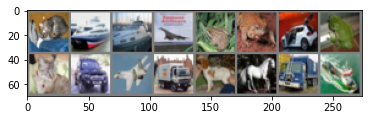

GroundTruth:  cat, ship, ship, plane, frog, frog, car, frog, cat, car, plane, truck, dog, horse, truck, ship
Prediction:  cat, ship, ship, ship, frog, frog, car, bird, cat, car, plane, truck, dog, horse, truck, ship


In [ ]:
# test the network
test_examples = iter(test_loader)
images, labels = test_examples.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ', '.join(f'{classes[labels[j]]}' for j in range(batch_size)))

images = images.to(device)
labels = labels.to(device)

outputs = model(images)
_, predictions = torch.max(outputs, 1)

print('Prediction: ', ', '.join(f'{classes[predictions[j]]}' for j in range(batch_size)))